In [1]:
import requests
import pandas as pd
import json
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [2]:
# Access Disaster Declaation Summary Data from FEMA
# Total size - 65149
# url = "https://www.fema.gov/api/open/v2/DisasterDeclarationsSummaries?$top=10000"
# disasterDeclarationSummaries=requests.get(url)
# disasterDeclarationSummariesJson = disasterDeclarationSummaries.json()

In [3]:
def getRecordCount(url):
    linecountReq = url+"$inlinecount=allpages&$select=id&$top=1"
    print('URL #',linecountReq)
    linecountRes = requests.get(linecountReq)
    if (linecountRes.status_code == 200) :
        linecountJson = linecountRes.json()
        linecount = linecountJson["metadata"]["count"]
        return linecount

In [4]:
def getDelcationSummaryDataFrame(baseUrl, disasterDeclarationSummariesDataFrame, loopNum, top):
    i=0
    skip=0
    while(i<loopNum):
        disasterDeclationSummaryURL = baseUrl + "&$metadata=off&$format=jsona&$skip=" + str(skip) + "&$top=" + str(top)
        disasterDeclationSummaryResponse = requests.get(disasterDeclationSummaryURL)
        if(disasterDeclationSummaryResponse.status_code==200):
            disasterDeclarationSummariesJson = disasterDeclationSummaryResponse.json()
            disasterDF=pd.DataFrame(disasterDeclarationSummariesJson)
            disasterDeclarationSummariesDataFrame=pd.concat([disasterDeclarationSummariesDataFrame, disasterDF])
            print("Success! Number of records #  ", disasterDeclarationSummariesDataFrame.shape)
            skip+=top
        else:
            print("Failed")
        i+=1
    return disasterDeclarationSummariesDataFrame

In [5]:
baseUrl = "https://www.fema.gov/api/open/v2/DisasterDeclarationsSummaries?"
top = 10000

In [6]:
linecount = getRecordCount(baseUrl)
print(linecount)

URL # https://www.fema.gov/api/open/v2/DisasterDeclarationsSummaries?$inlinecount=allpages&$select=id&$top=1
65158


In [7]:
print(" Line Count :", linecount)
print(" Top : ",top)
loopNum= math.ceil(linecount/top)
print(" Number of Loops : ",loopNum)

 Line Count : 65158
 Top :  10000
 Number of Loops :  7


In [8]:
disasterDeclarationSummariesDataFrame = pd.DataFrame()
disasterDeclarationSummariesDataFrame = getDelcationSummaryDataFrame(baseUrl, disasterDeclarationSummariesDataFrame, loopNum, top)
print(" SIZE OF DATAFRAME : ", disasterDeclarationSummariesDataFrame.shape)
disasterDeclarationSummariesDataFrame.head()

Success! Number of records #   (10000, 25)
Success! Number of records #   (20000, 25)
Success! Number of records #   (30000, 25)
Success! Number of records #   (40000, 25)
Success! Number of records #   (50000, 25)
Success! Number of records #   (60000, 25)
Success! Number of records #   (65158, 25)
 SIZE OF DATAFRAME :  (65158, 25)


,femaDeclarationString,disasterNumber,state,declarationType,declarationDate,fyDeclared,incidentType,declarationTitle,ihProgramDeclared,iaProgramDeclared,...,tribalRequest,fipsStateCode,fipsCountyCode,placeCode,designatedArea,declarationRequestNumber,lastIAFilingDate,lastRefresh,hash,id
0,FM-5464-RI,5464,RI,FM,2023-04-14T00:00:00.000Z,2023,Fire,QUEENS RIVER FIRE,False,False,...,False,44,009,99009,"Washington (County)(in (P)MSA 5520,6480)",23042,None,2023-05-22T03:41:22.800Z,1111d4d4a33f8a6e4d383ac5bd0e60b9bf142da0,9b9a9d9c-8b03-4049-9b16-a3c0d581556c
1,FM-5463-KS,5463,KS,FM,2023-04-13T00:00:00.000Z,2023,Fire,HADDAM FIRE,False,False,...,False,20,201,99201,Washington (County),23038,None,2023-05-22T03:41:22.800Z,78dd55a181f146622eb65835b5d794689d1ea7f2,57d936ce-a0d7-412a-9d78-18aee530c146
2,DR-4731-CO,4731,CO,DR,2023-08-25T00:00:00.000Z,2023,Flood,"SEVERE STORMS, FLOODING, AND TORNADOES",False,False,...,False,08,009,99009,Baca (County),23081,None,2023-10-02T19:21:20.859Z,44d903d3d79b5295f58aefdd35682a8d3011644d,fe1befa2-d7ac-4400-b430-36bf30ac9a15
3,DR-4731-CO,4731,CO,DR,2023-08-25T00:00:00.000Z,2023,Flood,"SEVERE STORMS, FLOODING, AND TORNADOES",False,False,...,False,08,061,99061,Kiowa (County),23081,None,2023-10-02T19:21:20.859Z,ecfd4777766336e18a46d1eb231fc25922f8b014,880f5941-94fb-4c00-afb8-2f1e32fe1b5b
4,DR-4731-CO,4731,CO,DR,2023-08-25T00:00:00.000Z,2023,Flood,"SEVERE STORMS, FLOODING, AND TORNADOES",False,False,...,False,08,099,99099,Prowers (County),23081,None,2023-10-02T19:21:20.859Z,90ab966409613986143ee242870748e8d19aa525,875a66ca-6234-423a-9e92-3626484e11d6


In [9]:
disasterDeclarationSummariesDataFrame.columns

Index(['femaDeclarationString', 'disasterNumber', 'state', 'declarationType',
       'declarationDate', 'fyDeclared', 'incidentType', 'declarationTitle',
       'ihProgramDeclared', 'iaProgramDeclared', 'paProgramDeclared',
       'hmProgramDeclared', 'incidentBeginDate', 'incidentEndDate',
       'disasterCloseoutDate', 'tribalRequest', 'fipsStateCode',
       'fipsCountyCode', 'placeCode', 'designatedArea',
       'declarationRequestNumber', 'lastIAFilingDate', 'lastRefresh', 'hash',
       'id'],
      dtype='object')

In [10]:
disasterDeclarationSummariesDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65158 entries, 0 to 5157
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   femaDeclarationString     65158 non-null  object
 1   disasterNumber            65158 non-null  int64 
 2   state                     65158 non-null  object
 3   declarationType           65158 non-null  object
 4   declarationDate           65158 non-null  object
 5   fyDeclared                65158 non-null  int64 
 6   incidentType              65158 non-null  object
 7   declarationTitle          65158 non-null  object
 8   ihProgramDeclared         65158 non-null  bool  
 9   iaProgramDeclared         65158 non-null  bool  
 10  paProgramDeclared         65158 non-null  bool  
 11  hmProgramDeclared         65158 non-null  bool  
 12  incidentBeginDate         65158 non-null  object
 13  incidentEndDate           64690 non-null  object
 14  disasterCloseoutDate      50

In [11]:
# Unique list of States in the dataset.
disasterDeclarationSummariesDataFrame['state'].unique()

array(['RI', 'KS', 'CO', 'GA', 'TX', 'OR', 'FL', 'CA', 'SD', 'WA', 'UT',
       'ID', 'HI', 'MT', 'NM', 'NV', 'WY', 'AZ', 'OK', 'AK', 'VT', 'NC',
       'TN', 'KY', 'NH', 'IL', 'NE', 'AL', 'IN', 'AR', 'MS', 'ME', 'NY',
       'ND', 'WV', 'SC', 'VA', 'PR', 'AS', 'MN', 'MO', 'MA', 'IA', 'CT',
       'DE', 'PA', 'NJ', 'LA', 'MI', 'MD', 'WI', 'MP', 'GU', 'VI', 'OH',
       'DC', 'FM', 'MH', 'PW'], dtype=object)

In [12]:
print(disasterDeclarationSummariesDataFrame['declarationDate'].sort_values().unique())

['1953-05-02T00:00:00.000Z' '1953-05-15T00:00:00.000Z'
 '1953-05-29T00:00:00.000Z' ... '2024-05-02T00:00:00.000Z'
 '2024-05-03T00:00:00.000Z' '2024-05-14T00:00:00.000Z']


In [13]:
# Another view - Disaster count by state.
disasterDeclarationSummariesDataFrame.groupby('state',sort='state')['disasterNumber'].count()

state
AK     333
AL    1675
AR    1613
AS      76
AZ     337
CA    1667
CO     660
CT     258
DC      23
DE      53
FL    2451
FM      31
GA    2310
GU      22
HI     107
IA    1863
ID     361
IL    1306
IN    1464
KS    1797
KY    2693
LA    2503
MA     412
MD     447
ME    1063
MH      53
MI     805
MN    1589
MO    2735
MP      76
MS    1939
MT     624
NC    2096
ND    1393
NE    1488
NH     313
NJ     626
NM     517
NV     280
NY    1515
OH    1292
OK    2515
OR     601
PA    1239
PR    1987
PW       1
RI     123
SC     993
SD    1441
TN    1689
TX    5200
UT     254
VA    2524
VI      81
VT     379
WA    1005
WI     892
WV    1238
WY     130
Name: disasterNumber, dtype: int64

In [14]:
print(disasterDeclarationSummariesDataFrame.groupby('declarationDate')['disasterNumber'].count())

declarationDate
1953-05-02T00:00:00.000Z     1
1953-05-15T00:00:00.000Z     1
1953-05-29T00:00:00.000Z     1
1953-06-02T00:00:00.000Z     1
1953-06-06T00:00:00.000Z     1
                            ..
2024-04-28T00:00:00.000Z    33
2024-04-30T00:00:00.000Z     8
2024-05-02T00:00:00.000Z    11
2024-05-03T00:00:00.000Z     2
2024-05-14T00:00:00.000Z     8
Name: disasterNumber, Length: 3414, dtype: int64


In [15]:
# PIVOT Table that shows the Date/State and Count 
disasterPivot = pd.pivot_table(disasterDeclarationSummariesDataFrame,values=['disasterNumber'],index=['declarationDate','state'],aggfunc={'disasterNumber':'count'})
disasterPivot.shape
display(disasterPivot.head(200))
display(disasterPivot.sort_values('declarationDate',ascending=False))
disasterPivot.sort_values('disasterNumber',ascending=False)

,,disasterNumber
declarationDate,state,
1953-05-02T00:00:00.000Z,GA,1
1953-05-15T00:00:00.000Z,TX,1
1953-05-29T00:00:00.000Z,LA,1
1953-06-02T00:00:00.000Z,MI,1
1953-06-06T00:00:00.000Z,MT,1
...,...,...
1965-05-26T00:00:00.000Z,SD,4
1965-06-14T00:00:00.000Z,MO,6
1965-06-19T00:00:00.000Z,CO,27


,,disasterNumber
declarationDate,state,
2024-05-14T00:00:00.000Z,IA,8
2024-05-03T00:00:00.000Z,NE,2
2024-05-02T00:00:00.000Z,OH,11
2024-04-30T00:00:00.000Z,OK,8
2024-04-28T00:00:00.000Z,WA,17
...,...,...
1953-06-06T00:00:00.000Z,MT,1
1953-06-02T00:00:00.000Z,MI,1
1953-05-29T00:00:00.000Z,LA,1


,,disasterNumber
declarationDate,state,
2020-04-04T00:00:00.000Z,ME,443
2020-03-13T00:00:00.000Z,TX,258
1998-08-26T00:00:00.000Z,TX,257
2020-03-25T00:00:00.000Z,TX,257
2006-01-11T00:00:00.000Z,TX,255
...,...,...
2004-08-11T00:00:00.000Z,WA,1
2004-08-10T00:00:00.000Z,AK,1
2004-08-08T00:00:00.000Z,CA,1


<Axes: xlabel='state'>

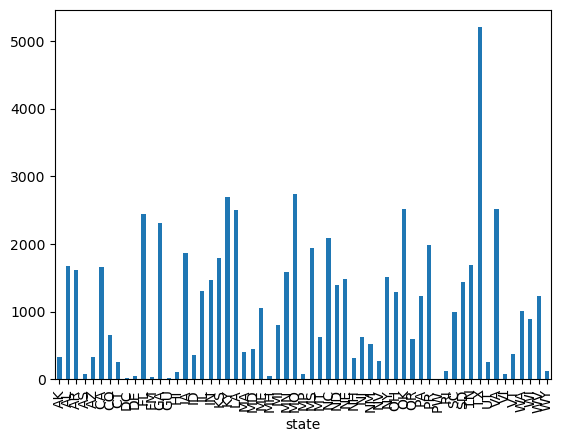

In [16]:
disasterDeclarationSummariesDataFrame.groupby('state')['disasterNumber'].count().plot(kind='bar',)

[2023 2022 2021 2020 2019 2018 2017 2016 2015 2014 2013 2012 2011 2005
 2008 2010 2024 2009 2007 2004 2003 2002 2001 1999 2006 2000 1998 1996
 1995 1994 1993 1992 1987 1984 1983 1982 1980 1979 1978 1977 1976 1975
 1974 1997 1991 1990 1989 1988 1986 1985 1981 1973 1971 1970 1972 1969
 1968 1967 1966 1965 1964 1963 1962 1961 1960 1959 1958 1957 1956 1955
 1954 1953]
[ 4  8  9  7  3 12 10  6 11  5  2  1]


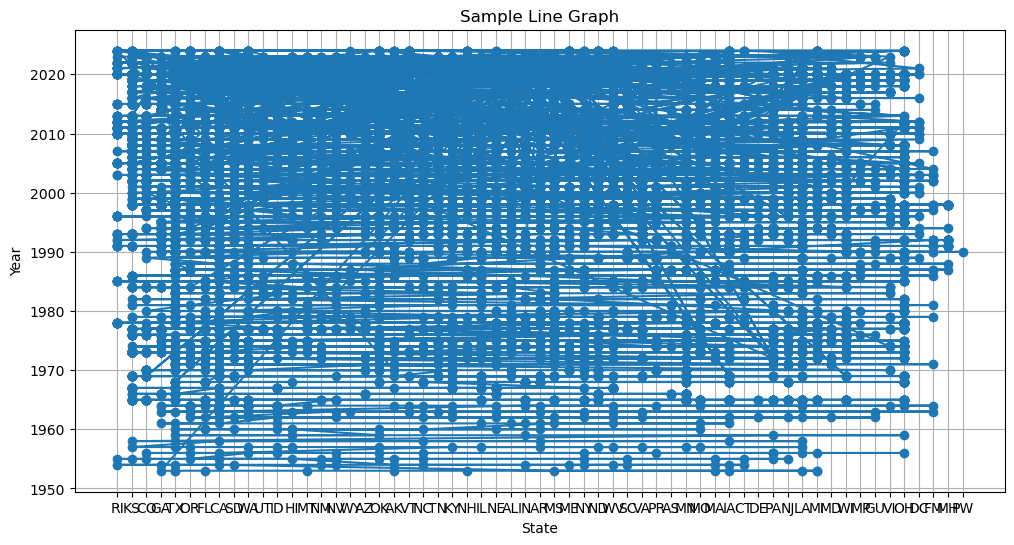

In [17]:
#disasterDF.plot(kind='scatter',x='state',y='declarationDate',subplots=True,figsize=(200,300))

#disasterDF['year']=

disasterDeclarationSummariesDataFrame['Date'] = pd.to_datetime(disasterDeclarationSummariesDataFrame['declarationDate'])
disasterDeclarationSummariesDataFrame['Year']= disasterDeclarationSummariesDataFrame['Date'].dt.year
disasterDeclarationSummariesDataFrame['Month']= disasterDeclarationSummariesDataFrame['Date'].dt.month

print(disasterDeclarationSummariesDataFrame['Year'].unique())
print(disasterDeclarationSummariesDataFrame['Month'].unique())

#disasterDF.plot(x='state',y='Year',kind='scatter',figsize=(75,25))

plt.figure(figsize=(12, 6))
plt.plot(disasterDeclarationSummariesDataFrame['state'], disasterDeclarationSummariesDataFrame['Year'], marker='o', linestyle='-')
plt.title('Sample Line Graph')
plt.xlabel('State')
plt.ylabel('Year')
plt.grid(True)
plt.show()

# Seaborn Charts

# Area , Population , Disasters , Economic Elements & Health

In [18]:
disasterDeclarationSummariesDataFrame.isnull().sum()

femaDeclarationString           0
disasterNumber                  0
state                           0
declarationType                 0
declarationDate                 0
fyDeclared                      0
incidentType                    0
declarationTitle                0
ihProgramDeclared               0
iaProgramDeclared               0
paProgramDeclared               0
hmProgramDeclared               0
incidentBeginDate               0
incidentEndDate               468
disasterCloseoutDate        14386
tribalRequest                   0
fipsStateCode                   0
fipsCountyCode                  0
placeCode                       0
designatedArea                  0
declarationRequestNumber        0
lastIAFilingDate            47078
lastRefresh                     0
hash                            0
id                              0
Date                            0
Year                            0
Month                           0
dtype: int64

In [19]:
finalDataFrame = disasterDeclarationSummariesDataFrame[['disasterNumber','state','placeCode','Year','Date','Month','declarationDate','declarationTitle']]

finalDataFrame.head()

,disasterNumber,state,placeCode,Year,Date,Month,declarationDate,declarationTitle
0,5464,RI,99009,2023,2023-04-14 00:00:00+00:00,4,2023-04-14T00:00:00.000Z,QUEENS RIVER FIRE
1,5463,KS,99201,2023,2023-04-13 00:00:00+00:00,4,2023-04-13T00:00:00.000Z,HADDAM FIRE
2,4731,CO,99009,2023,2023-08-25 00:00:00+00:00,8,2023-08-25T00:00:00.000Z,"SEVERE STORMS, FLOODING, AND TORNADOES"
3,4731,CO,99061,2023,2023-08-25 00:00:00+00:00,8,2023-08-25T00:00:00.000Z,"SEVERE STORMS, FLOODING, AND TORNADOES"
4,4731,CO,99099,2023,2023-08-25 00:00:00+00:00,8,2023-08-25T00:00:00.000Z,"SEVERE STORMS, FLOODING, AND TORNADOES"


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


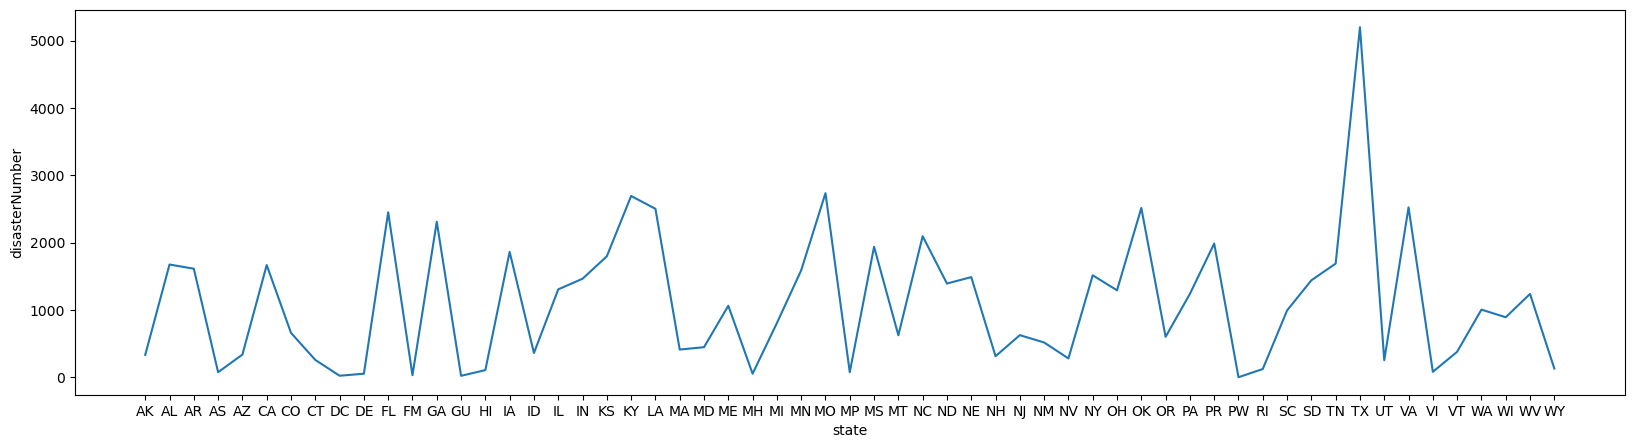

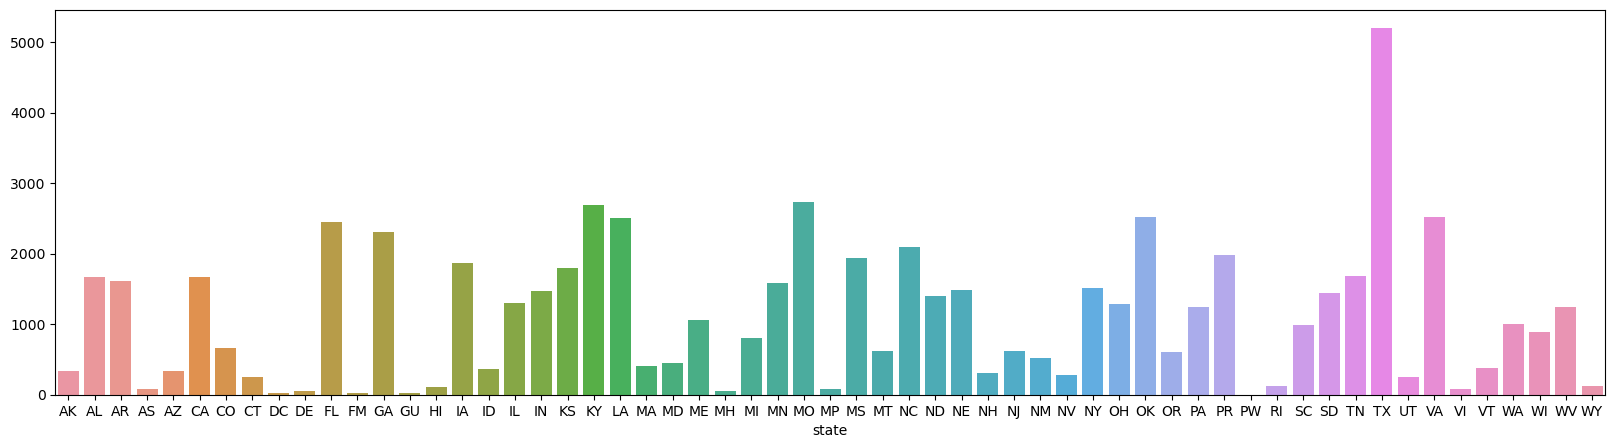

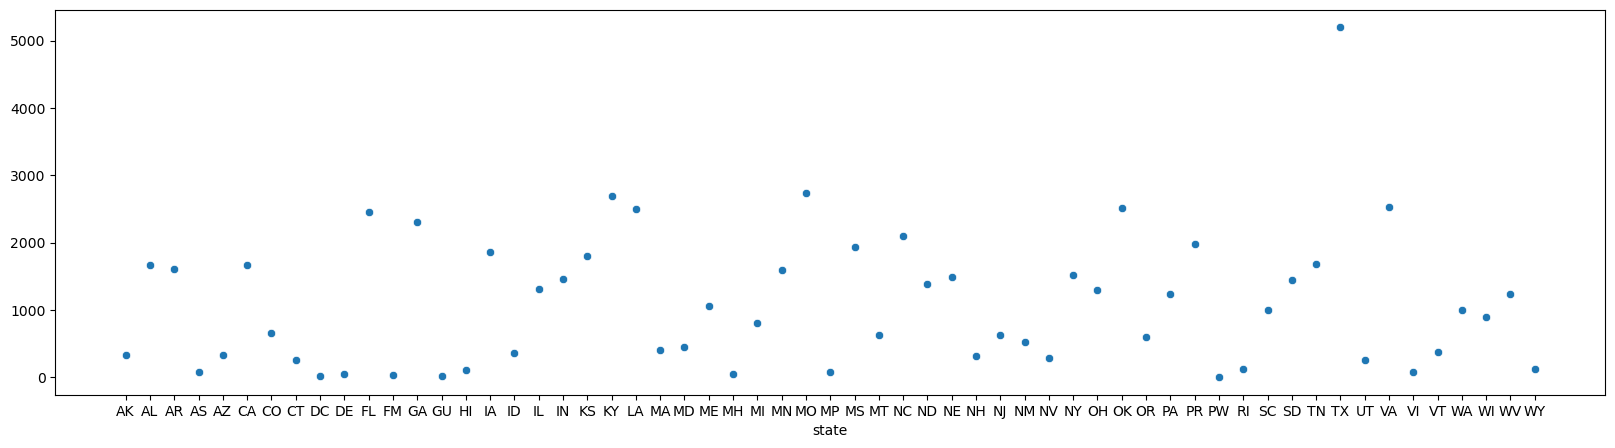

In [20]:
stateGroup = finalDataFrame.groupby('state')['disasterNumber'].count()

plt.figure(figsize=(20,5))
sns.lineplot(data=stateGroup)
plt.show()

plt.figure(figsize=(20,5))
sns.barplot(x=stateGroup.index, y=stateGroup.values)
plt.show()

# Scatter plot (Requires two series)
plt.figure(figsize=(20,5))
sns.scatterplot(x=stateGroup.index, y=stateGroup.values)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


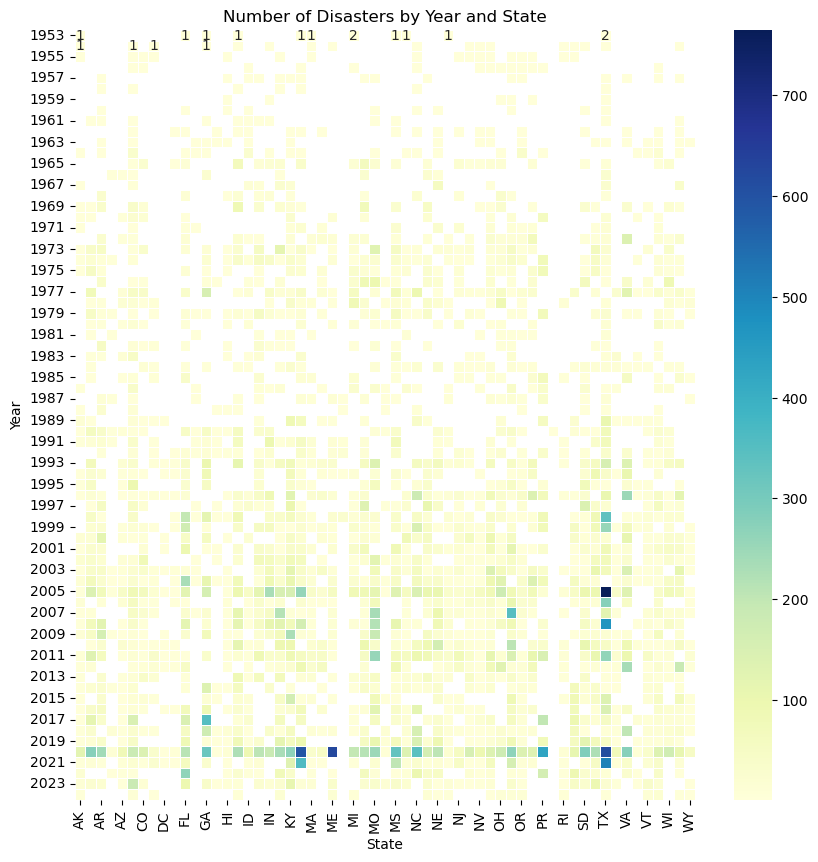

In [21]:
# Pivot the DataFrame to have 'Year' as rows, 'State' as columns, and 'Instances' as values
pivot_df = finalDataFrame.pivot_table(index='Year', columns='state', values='disasterNumber', aggfunc='count')

plt.figure(figsize=(10, 10))
sns.heatmap(pivot_df, cmap='YlGnBu', annot=True, fmt='g', linewidths=0.5)
plt.title('Number of Disasters by Year and State')
plt.xlabel('State')
plt.ylabel('Year')
plt.show()

In [22]:
finalDataFrame
finalDisasterSummaryDF=finalDataFrame
finalDisasterSummaryDF.head()

,disasterNumber,state,placeCode,Year,Date,Month,declarationDate,declarationTitle
0,5464,RI,99009,2023,2023-04-14 00:00:00+00:00,4,2023-04-14T00:00:00.000Z,QUEENS RIVER FIRE
1,5463,KS,99201,2023,2023-04-13 00:00:00+00:00,4,2023-04-13T00:00:00.000Z,HADDAM FIRE
2,4731,CO,99009,2023,2023-08-25 00:00:00+00:00,8,2023-08-25T00:00:00.000Z,"SEVERE STORMS, FLOODING, AND TORNADOES"
3,4731,CO,99061,2023,2023-08-25 00:00:00+00:00,8,2023-08-25T00:00:00.000Z,"SEVERE STORMS, FLOODING, AND TORNADOES"
4,4731,CO,99099,2023,2023-08-25 00:00:00+00:00,8,2023-08-25T00:00:00.000Z,"SEVERE STORMS, FLOODING, AND TORNADOES"


In [23]:
baseUrlFunding = "https://www.fema.gov/api/open/v1/PublicAssistanceFundedProjectsDetails?"
fundingRecordCount = getRecordCount(baseUrlFunding)
print(fundingRecordCount)
loopNum= math.ceil(fundingRecordCount/top)
print(loopNum)

URL # https://www.fema.gov/api/open/v1/PublicAssistanceFundedProjectsDetails?$inlinecount=allpages&$select=id&$top=1
796731
80


In [ ]:
disasterFundingProjectsDataFrame = pd.DataFrame()
disasterFundingProjectsDataFrame = getDelcationSummaryDataFrame(baseUrlFunding, disasterFundingProjectsDataFrame, loopNum, top)
print(" SIZE OF DATAFRAME : ", disasterFundingProjectsDataFrame.shape)
disasterFundingProjectsDataFrame.head()

Success! Number of records #   (10000, 22)
Success! Number of records #   (20000, 22)
Success! Number of records #   (30000, 22)


In [ ]:
disasterFundingProjectsDataFrame.info()

In [ ]:
disasterFundingProjectsDataFrame.isna().sum()

In [ ]:
finalFundingDF=disasterFundingProjectsDataFrame[['disasterNumber','declarationDate','stateCode','state','projectSize','projectAmount','federalShareObligated']]

print(finalFundingDF['disasterNumber'].unique())
print(finalDisasterSummaryDF['disasterNumber'].unique())

In [ ]:
disasterSummaryAndFunding_DF=pd.merge(finalDisasterSummaryDF,finalFundingDF,on='disasterNumber',how='inner')

In [ ]:
disasterSummaryAndFunding_DF['projectAmountInBillions']=disasterSummaryAndFunding_DF['projectAmount']/1e9
disasterSummaryAndFunding_DF.shape

In [ ]:
disasterSummaryAndFunding_DF.head()

In [ ]:
finalDisasterSummaryDF.head()

In [ ]:
finalFundingDF.head()

In [ ]:
fundingBySateAndYear = disasterSummaryAndFunding_DF.groupby(by=['Year','stateCode'])['projectAmountInBillions'].sum()


In [ ]:
fundingBySateAndYear_DF=pd.DataFrame(fundingBySateAndYear)
display(fundingBySateAndYear_DF)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.lineplot(data=fundingBySateAndYear_DF, x='Year', y='projectAmountInBillions', hue='stateCode',legend=False)
plt.title('Trends in Amount Over Time')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.show()

In [ ]:
fundingBySateAndYear_DF

In [ ]:
# Bar Plot
plt.figure(figsize=(20, 6))

sns.scatterplot(data=fundingBySateAndYear_DF, x='Year', y='projectAmountInBillions', hue='stateCode', legend=False)
plt.title('Amount by Year and State')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.show()

In [ ]:
disasterSummaryAndFunding_DF.head()

disasterSummaryAndFunding_pivot=disasterSummaryAndFunding_DF.pivot_table(index='Year',columns='stateCode',values='projectAmountInBillions',aggfunc='sum')

In [ ]:
disasterSummaryAndFunding_pivot

In [ ]:
plt.figure(figsize=(60, 10))
disasterSummaryAndFunding_pivot.plot(kind='bar', stacked=True,legend=False)
plt.title('Amount by Year and State')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.show()

In [ ]:
disasterSummaryAndFunding_DF.head()

fundingByState_pivot=disasterSummaryAndFunding_DF.groupby(by='stateCode')['projectAmount'].sum()

plt.figure(figsize=(60, 20))
fundingByState_pivot.plot(kind='bar', stacked=True,legend=False)
plt.title('Amount by Year and State')
plt.xlabel('STATE')
plt.ylabel('Amount')
plt.show()


In [ ]:
# Data Frame contains Disater Summary and Project Funding.
disasterSummaryAndFunding_DF.head(5)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# this script reads all the CDC monthly mortality files, combines them into one, for the purpose of visualizations
mortality_files = ['Mort2018US.PubUse.csv','Mort2019US.PubUse.csv','Mort2020US.PubUse.csv','Mort2021US.PubUse.csv','Mort2022US.PubUse.csv']

mortality5yrsdf = pd.DataFrame()

for infile in mortality_files:
    thisfile = 'Resources/'+infile
    print('loading',thisfile)
    thisdf = pd.read_csv(thisfile)
    mortality5yrsdf = pd.concat([mortality5yrsdf,thisdf])

print('loaded',len(mortality5yrsdf),'months of mortality data.')

mortality5yrsdf.drop('Unnamed: 0',axis=1,inplace=True)
mortality5yrsdf


In [ ]:
mortality5yrsdf['date'] = pd.to_datetime(dict(year=mortality5yrsdf['year'], month=mortality5yrsdf['month'], day=1))
mortality5yrsdf.set_index('date',inplace=True)
mortality5yrsdf

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

outbreakfilename = 'Resources/NationalOutbreakPublicDataToolFull.xlsx'

In [ ]:
obdf = pd.read_excel(outbreakfilename)
outbreakDataFrame=obdf
obdf.loc[obdf['State'] == 'New Jersey']

In [ ]:
# Merge the datasets and design graphs
# FEMA Disaster Summary ,  FEMA Disaster Relief Project Funds , Mortality Rate,  Out Breaks
disasterSummaryAndFunding_DF
mortality5yrsdf
outbreakDataFrame

display(disasterSummaryAndFunding_DF.head())
display(mortality5yrsdf.head())
display(outbreakDataFrame.head())

In [ ]:
# Size and Min / Max Years 
print( "Disaster Summary and Funding Dataframe") 
print("-"*100)
print("Size # ", disasterSummaryAndFunding_DF.shape)
print("Date Range #", disasterSummaryAndFunding_DF['Year'].min() , disasterSummaryAndFunding_DF['Year'].max())
print("Data States #", len(disasterSummaryAndFunding_DF['stateCode'].unique()))
print("_"*100)

print( "Mortality Summary ") 
print("-"*100)
print("Size # ", mortality5yrsdf.shape)
print("Date Range #", mortality5yrsdf['year'].min() , mortality5yrsdf['year'].max())
#print("Data States #", len(mortality5yrsdf['stateCode'].unique()))
print("_"*100)

print( "Outbreak Summary") 
print("-"*100)
print("Size # ", outbreakDataFrame.shape)
print("Date Range #", outbreakDataFrame['Year'].min() , disasterSummaryAndFunding_DF['Year'].max())
print("Data States #", len(outbreakDataFrame['State'].unique()))
print("_"*100)


In [ ]:
disasterSummaryAndFunding_DF.rename(columns={'state_y':'State'},inplace=True)
display(disasterSummaryAndFunding_DF.columns)

display(mortality5yrsdf.columns)

display(outbreakDataFrame.columns)

In [ ]:
display(disasterSummaryAndFunding_DF['Year'].unique())
display(disasterSummaryAndFunding_DF['State'].unique())
display(disasterSummaryAndFunding_DF['Month'].unique())

display(outbreakDataFrame['Year'].unique())
display(outbreakDataFrame['State'].unique())
display(outbreakDataFrame['Month'].unique())


In [ ]:
#disasterSummary_Funding_Outbreak_DF = pd.merge(disasterSummaryAndFunding_DF,outbreakDataFrame,how='inner',on=['Year','Month','State'])

In [ ]:
#display(disasterSummary_Funding_Outbreak_DF.head())